In [27]:
from glob import glob
from pickle import load
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

base_dir = "C:\\Users\\Chris\\co_cloudcover\\"
model_dir = base_dir + "models\\"

raw_dir = "D:\\proj\\co_cloudcover\\raw_data\\"

with open(model_dir + "rfc_20240529.pkl", "rb") as f:
    rfc = load(f)
with open(model_dir + "pca_20240529.pkl", "rb") as f:
    pca = load(f)
with open(model_dir + "scaler_20240529.pkl", "rb") as f:
    scaler = load(f)

IC_parquets = glob(raw_dir + 'ImageCollection_2020*.parquet')# + "ImageCollection_*.parquet")    
IC_parquets

['D:\\proj\\co_cloudcover\\raw_data\\ImageCollection_202001.parquet',
 'D:\\proj\\co_cloudcover\\raw_data\\ImageCollection_202002.parquet',
 'D:\\proj\\co_cloudcover\\raw_data\\ImageCollection_202003.parquet',
 'D:\\proj\\co_cloudcover\\raw_data\\ImageCollection_202004.parquet',
 'D:\\proj\\co_cloudcover\\raw_data\\ImageCollection_202005.parquet',
 'D:\\proj\\co_cloudcover\\raw_data\\ImageCollection_202006.parquet',
 'D:\\proj\\co_cloudcover\\raw_data\\ImageCollection_202007.parquet',
 'D:\\proj\\co_cloudcover\\raw_data\\ImageCollection_202008.parquet',
 'D:\\proj\\co_cloudcover\\raw_data\\ImageCollection_202009.parquet',
 'D:\\proj\\co_cloudcover\\raw_data\\ImageCollection_202010.parquet',
 'D:\\proj\\co_cloudcover\\raw_data\\ImageCollection_202011.parquet',
 'D:\\proj\\co_cloudcover\\raw_data\\ImageCollection_202012.parquet']

In [28]:
features = [
    "sur_refl_b01",
    "sur_refl_b02",
    "sur_refl_b03",
    "sur_refl_b04",
    "sur_refl_b05",
    "sur_refl_b06",
    "sur_refl_b07",
]

try:
    del(day_count,cloud_count)
except:
    pass

model_results = []
for IC_parquet in IC_parquets:#["C:\\Users\\Chris\\co_cloudcover\\data\\raw\\ImageCollection_202307"]:#
    result_name = IC_parquet.split('_')[-1]
    print(IC_parquet)
    IC = gpd.read_parquet(IC_parquet)
    IC['date'] = IC['time'].dt.strftime("%Y-%m-%d")

    IC = IC.dropna().reset_index(drop=True)
    IC_scaled=scaler.transform(IC[features])#.reset_index(drop=True)
    IC_pca=pca.transform(IC_scaled)
    IC["prediction"] = rfc.predict(IC_pca)

    IC_day_count = IC.\
        groupby(['geometry']).\
        agg("count").\
        reset_index()\
        [["prediction","geometry"]]
    IC_cloud_count = IC[IC["prediction"]=="snow_cloud"].\
        groupby(['geometry']).\
        agg("count").\
        reset_index()\
        [["prediction","geometry"]]

    model_results.append({
        'name':result_name,
        'day_count':IC_day_count,
        'cloud_count':IC_cloud_count
    })
    
    """try:
        day_count["prediction"] = day_count["prediction"] + IC_day_count["prediction"]
        cloud_count["prediction"] = cloud_count["prediction"] + IC_cloud_count["prediction"]
    except NameError:
        print("creating aggregate gdfs")
        day_count = IC_day_count[["prediction","geometry"]]
        cloud_count = IC_cloud_count[["prediction","geometry"]]

    day_count["clouds"] = cloud_count["prediction"]
    gdf = gpd.GeoDataFrame(IC_cloud_count)

    fig, ax = plt.subplots()
    gdf.plot(column="prediction",legend=True, figsize = (12,10), markersize=.2, ax=ax, vmin=0, vmax=30)
    plt.show()"""

print("Done")

D:\proj\co_cloudcover\raw_data\ImageCollection_202001.parquet
rows before dropna: 8726562
rows after dropna: 8726558


C:\Users\Chris\anaconda3\envs\sensat\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


D:\proj\co_cloudcover\raw_data\ImageCollection_202002.parquet
rows before dropna: 8163558
rows after dropna: 8163547


C:\Users\Chris\anaconda3\envs\sensat\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


D:\proj\co_cloudcover\raw_data\ImageCollection_202003.parquet
rows before dropna: 8726562
rows after dropna: 8726383


C:\Users\Chris\anaconda3\envs\sensat\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


D:\proj\co_cloudcover\raw_data\ImageCollection_202004.parquet
rows before dropna: 8445060
rows after dropna: 8442068


C:\Users\Chris\anaconda3\envs\sensat\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


D:\proj\co_cloudcover\raw_data\ImageCollection_202005.parquet
rows before dropna: 8726562
rows after dropna: 8722522


C:\Users\Chris\anaconda3\envs\sensat\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


D:\proj\co_cloudcover\raw_data\ImageCollection_202006.parquet
rows before dropna: 8445060
rows after dropna: 8424246


C:\Users\Chris\anaconda3\envs\sensat\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


D:\proj\co_cloudcover\raw_data\ImageCollection_202007.parquet
rows before dropna: 8726562
rows after dropna: 8721633


C:\Users\Chris\anaconda3\envs\sensat\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


D:\proj\co_cloudcover\raw_data\ImageCollection_202008.parquet
rows before dropna: 8726562
rows after dropna: 8726107


C:\Users\Chris\anaconda3\envs\sensat\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


D:\proj\co_cloudcover\raw_data\ImageCollection_202009.parquet
rows before dropna: 8445060
rows after dropna: 8444955


C:\Users\Chris\anaconda3\envs\sensat\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


D:\proj\co_cloudcover\raw_data\ImageCollection_202010.parquet
rows before dropna: 8726562
rows after dropna: 8726527


C:\Users\Chris\anaconda3\envs\sensat\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


D:\proj\co_cloudcover\raw_data\ImageCollection_202011.parquet
rows before dropna: 8445060
rows after dropna: 8445054


C:\Users\Chris\anaconda3\envs\sensat\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


D:\proj\co_cloudcover\raw_data\ImageCollection_202012.parquet
rows before dropna: 8726562
rows after dropna: 8726556


C:\Users\Chris\anaconda3\envs\sensat\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Done


In [25]:
temp_IC = gpd.GeoDataFrame(cloud_count)#[IC["time"]=="2023-07-02"]
temp_IC['lon'],temp_IC['lat'] = temp_IC.geometry.x,temp_IC.geometry.y
temp_IC = temp_IC[temp_IC["lon"]>-102.5]
temp_IC = temp_IC[temp_IC["lat"]<37.5]
temp_IC

NameError: name 'cloud_count' is not defined

202001.parquet


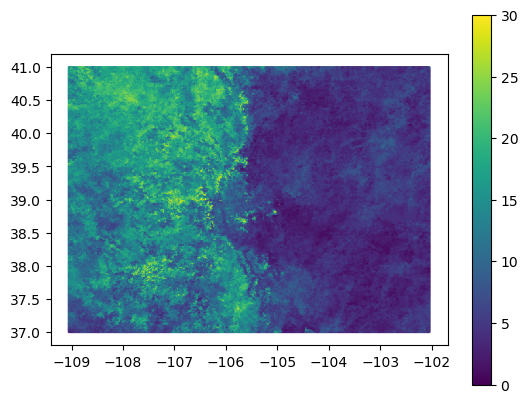

202002.parquet


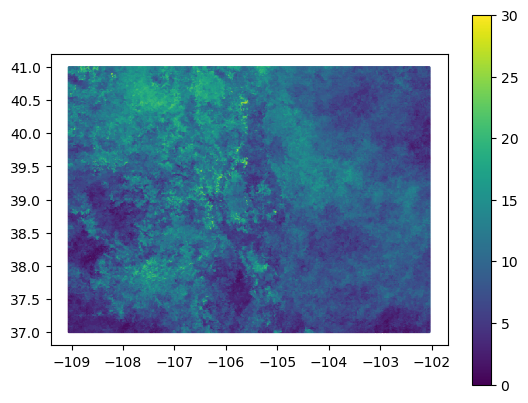

202003.parquet


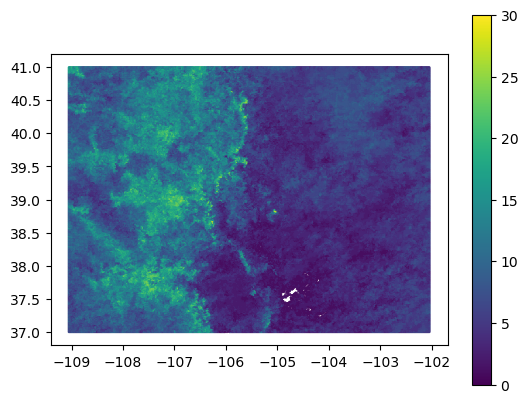

202004.parquet


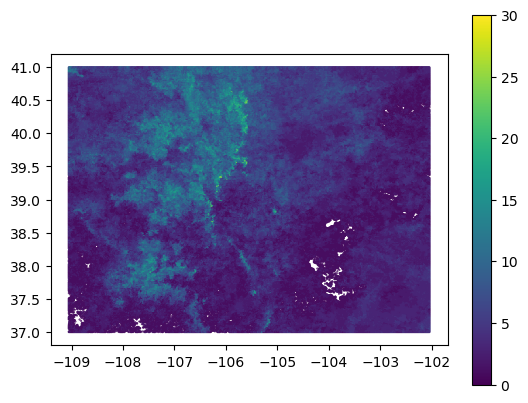

202005.parquet


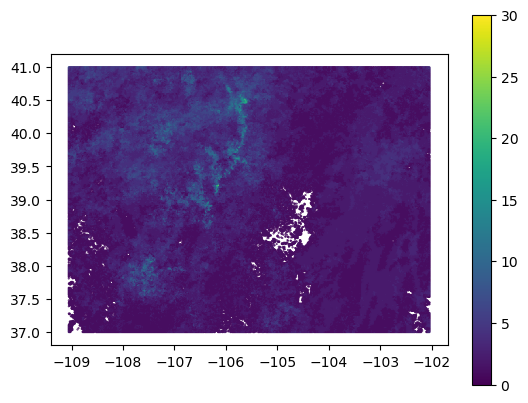

202006.parquet


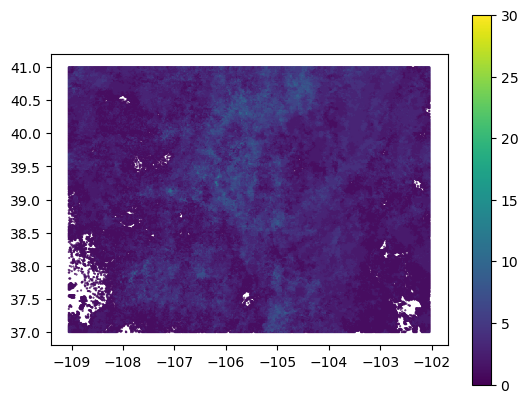

202007.parquet


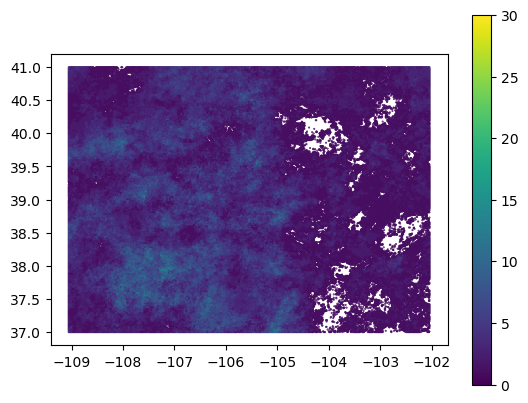

202008.parquet


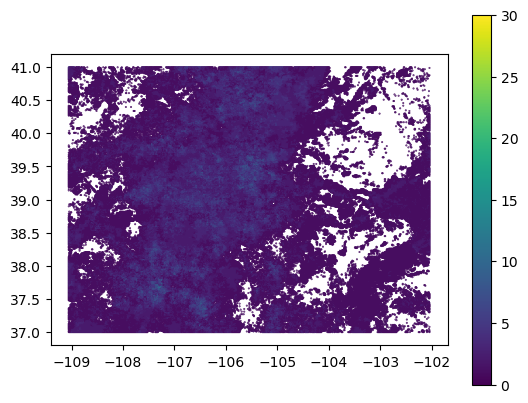

202009.parquet


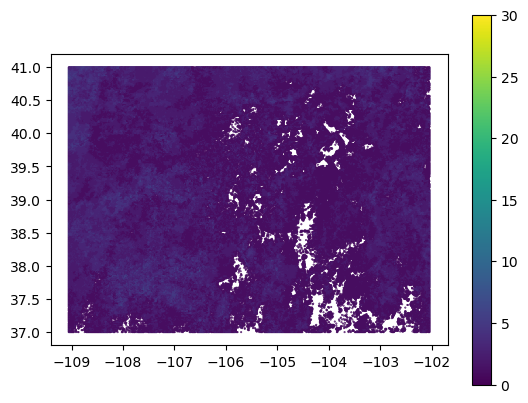

202010.parquet


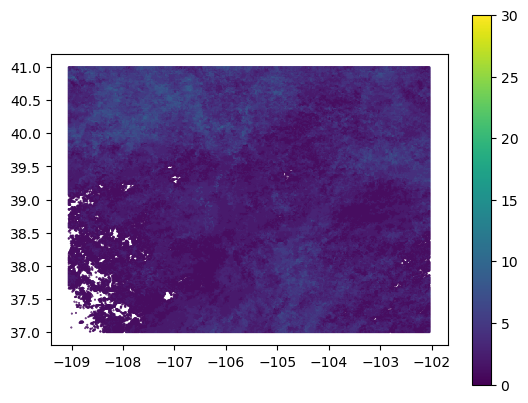

202011.parquet


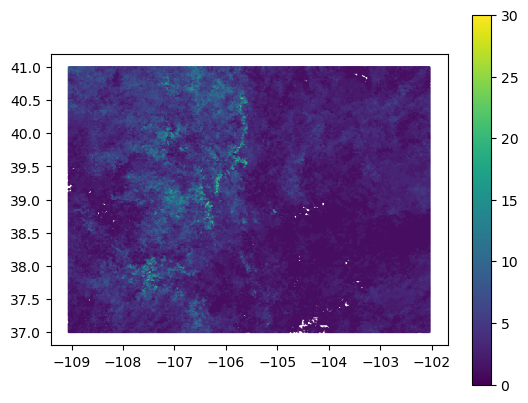

202012.parquet


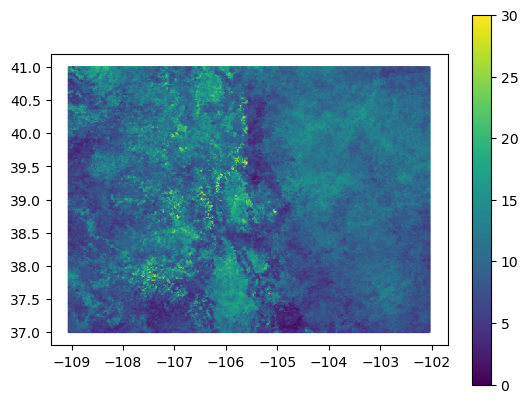

In [29]:
"""temp_IC = IC[IC["time"]=="2023-07-02"]

for IC_date in list(set(IC["time"])):
    temp_IC = IC[IC["time"]==IC_date]
    print(IC_date)
    fig, ax = plt.subplots()
    temp_IC.plot(column="prediction",legend=True, figsize = (12,10), markersize=.2, ax=ax, vmin=0, vmax=30)
    plt.show()"""

for result in model_results:
    name,days,clouds = result['name'], result['day_count'], result['cloud_count']
    print(name)
    fig, ax = plt.subplots()
    clouds = gpd.GeoDataFrame(clouds)
    clouds.plot(column="prediction",legend=True, figsize = (12,10), markersize=.2, ax=ax, vmin=0, vmax=30)
    plt.show()

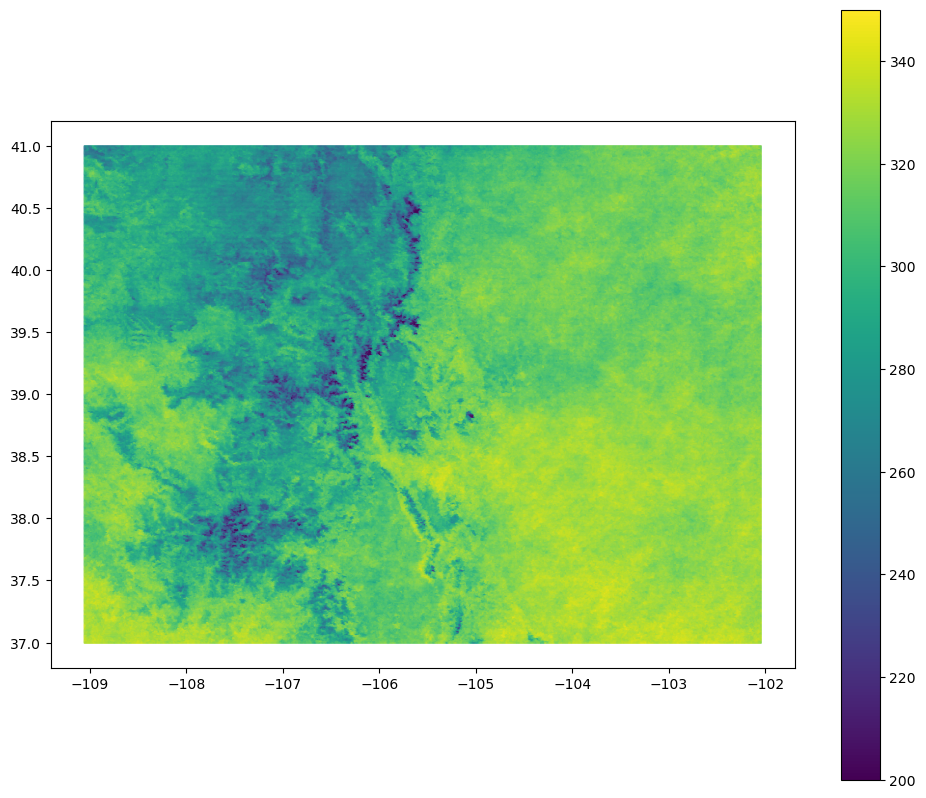

In [30]:
clouds_list = []
for result in model_results:
    name,days,clouds = result['name'], result['day_count'], result['cloud_count']
    clouds_list.append(clouds)
    #if result['name'] != '202307': continue
    #print(result)

clouds_2023 = pd.concat(clouds_list).\
        groupby(['geometry']).\
        agg("sum").\
        reset_index()\
        [["prediction","geometry"]]

fig, ax = plt.subplots()
clouds = gpd.GeoDataFrame(clouds_2023)
clouds["365"] = 365
clouds["DoS"] = clouds["365"] - clouds["prediction"]
#clouds.plot(column="DoS",legend=True, figsize = (12,10), markersize=.2, ax=ax, vmin=50, vmax=150)
clouds.plot(column="DoS",legend=True, figsize = (12,10), markersize=.2, ax=ax, vmin=200, vmax=350)
fig.set_size_inches(12,10)
plt.show()

In [95]:
day_count["clouds"] = cloud_count["prediction"]
gdf = gpd.GeoDataFrame(day_count)
gdf
#gdf.plot(column="clouds",legend=True, figsize = (12,10), markersize=.2)

,prediction,geometry,clouds
0,365,POINT (-109.05420 36.99775),59.0
1,365,POINT (-109.04420 36.99775),58.0
2,365,POINT (-109.05420 37.00775),57.0
3,365,POINT (-109.04420 37.00775),52.0
4,365,POINT (-109.03420 37.00775),55.0
...,...,...,...
281497,365,POINT (-102.06420 37.00775),NaN
281498,365,POINT (-102.05420 37.00775),NaN
281499,365,POINT (-102.04420 37.00775),NaN
281500,365,POINT (-102.05420 36.99775),NaN
